In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

from matplotlib.colors import ListedColormap

# For spatial plots
import geopandas as gpd
from shapely.geometry import Point

In [2]:
df = pd.read_csv('GCBD/Cleaned_Coral_Data.csv')
df.head()

Latitude_Degrees  Longitude_Degrees Ocean_Name            Realm_Name  \
0            23.163           -82.5260   Atlantic     Tropical Atlantic   
1           -17.575          -149.7833    Pacific  Eastern Indo-Pacific   
2            18.369           -64.5640   Atlantic     Tropical Atlantic   
3            17.760           -64.5680   Atlantic     Tropical Atlantic   
4            17.769           -64.5830   Atlantic     Tropical Atlantic   

                               Ecoregion_Name  Distance_to_Shore Exposure  \
0                     Cuba and Cayman Islands            8519.23  Exposed   
1            Society Islands French Polynesia            1431.62  Exposed   
2  Hispaniola Puerto Rico and Lesser Antilles             182.33  Exposed   
3  Hispaniola Puerto Rico and Lesser Antilles             313.13  Exposed   
4  Hispaniola Puerto Rico and Lesser Antilles             792.00  Exposed   

   Turbidity  Cyclone_Frequency  Depth_m  ... Windspeed  SSTA  SSTA_Maximum  \
0     0.0287              49.90    10.00  ...       8.0 -0.46          2.24   
1     0.0262              51.20    14.00  ...       2.0  1.29          3.10   
2     0.0429              61.52     7.00  ...       8.0  0.04          2.83   
3     0.0424              65.39     9.02  ...       3.0 -0.07          2.47   
4     0.0424              65.39    12.50  ...       3.0  0.00          2.30   

   SSTA_Frequency  SSTA_DHW   TSA  TSA_Maximum  TSA_Frequency  TSA_DHW  \
0             0.0      0.00 -0.80         1.83           0.00     0.00   
1             0.5      0.26  1.29         3.00           0.25     0.26   
2            16.0      0.00 -2.64         2.31           7.00     0.00   
3            22.0      0.00 -2.27         2.19           3.00     0.00   
4            16.0      0.00 -2.19         1.87           3.00     0.00   

         Date  
0  2005-09-15  
1  1991-03-15  
2  2006-01-15  
3  2006-04-15  
4  2006-04-15  

[5 rows x 24 columns]

In [3]:
df.shape

(26828, 24)

In [4]:
df.isnull().sum()

Latitude_Degrees     0
Longitude_Degrees    0
Ocean_Name           0
Realm_Name           0
Ecoregion_Name       0
Distance_to_Shore    0
Exposure             0
Turbidity            0
Cyclone_Frequency    0
Depth_m              0
Bleaching_Level      0
Percent_Bleaching    0
SST                  0
SST_Maximum          0
Windspeed            0
SSTA                 0
SSTA_Maximum         0
SSTA_Frequency       0
SSTA_DHW             0
TSA                  0
TSA_Maximum          0
TSA_Frequency        0
TSA_DHW              0
Date                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26828 entries, 0 to 26827
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude_Degrees   26828 non-null  float64
 1   Longitude_Degrees  26828 non-null  float64
 2   Ocean_Name         26828 non-null  object 
 3   Realm_Name         26828 non-null  object 
 4   Ecoregion_Name     26828 non-null  object 
 5   Distance_to_Shore  26828 non-null  float64
 6   Exposure           26828 non-null  object 
 7   Turbidity          26828 non-null  float64
 8   Cyclone_Frequency  26828 non-null  float64
 9   Depth_m            26828 non-null  float64
 10  Bleaching_Level    26828 non-null  object 
 11  Percent_Bleaching  26828 non-null  float64
 12  SST                26828 non-null  float64
 13  SST_Maximum        26828 non-null  float64
 14  Windspeed          26828 non-null  float64
 15  SSTA               26828 non-null  float64
 16  SSTA_Maximum       268

## Coral sites in the study (oceans and countries)

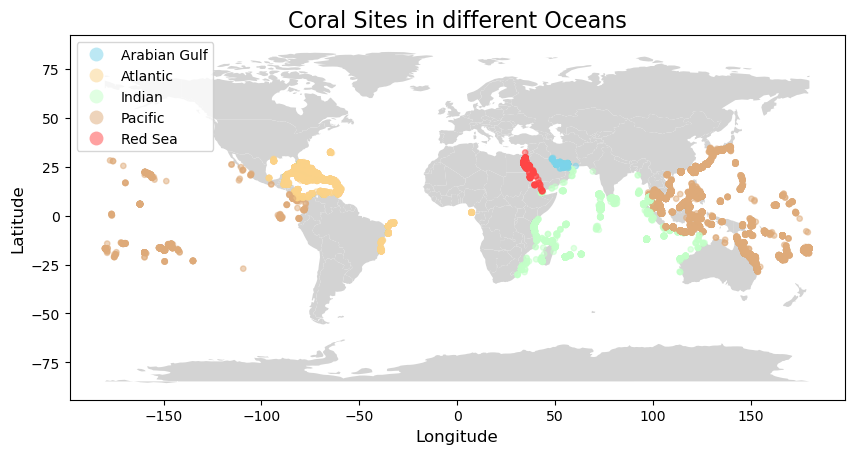

In [6]:
# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude_Degrees'], df['Latitude_Degrees'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Load a base map
world = gpd.read_file("https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json")

# Colormap
colors = ListedColormap(['#7BD3EA', '#FBD288', '#C2FFC7', '#DEAA79', '#FF4545'])

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
world.plot(ax=ax, color='lightgray')
geo_df.plot(
    ax=ax,
    column='Ocean_Name',  # Color by 'Ocean'
    categorical=True,
    legend=True,  # Add legend
    markersize=15,
    cmap=colors,  # Colormap for categories
    alpha=0.5
)

ax.set_title('Coral Sites in different Oceans', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

plt.savefig('Plots/coral_sites_in_oceans.png')
plt.show()

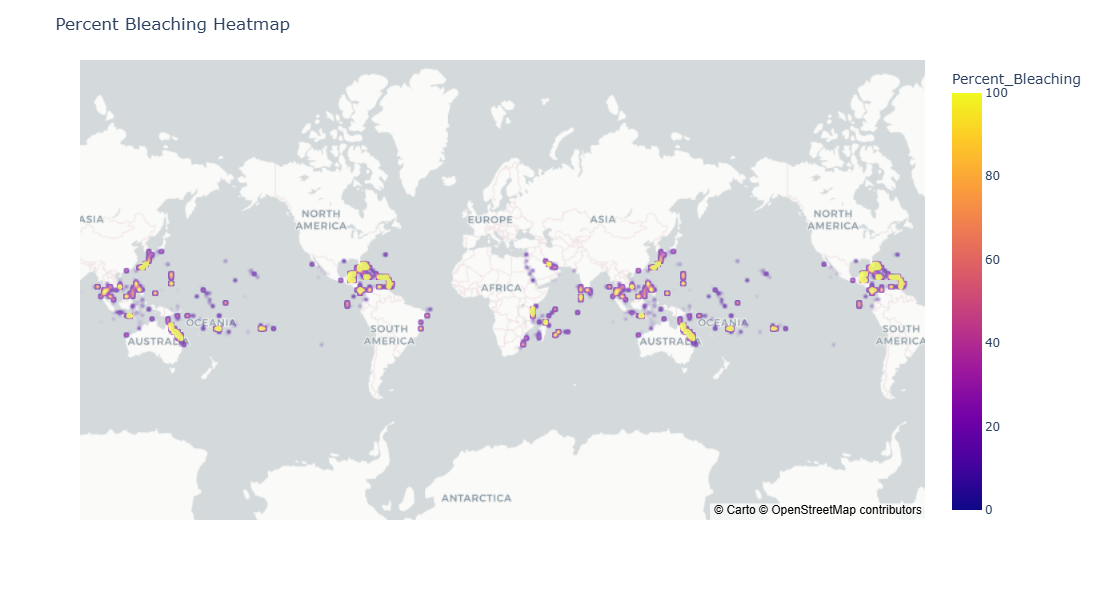

In [18]:
fig = px.density_mapbox(
    df,
    lat='Latitude_Degrees',
    lon='Longitude_Degrees',
    z='Percent_Bleaching',  # Value to visualize as density
    radius=2,  # Controls the smoothness of the heatmap
    center={'lat': df['Latitude_Degrees'].mean(), 'lon': df['Longitude_Degrees'].mean()},
    zoom=0,                # Initial zoom level
    mapbox_style="carto-positron",  # Use "stamen-terrain", "open-street-map", etc.
    opacity=0.6
)

# Control the size of the graph
fig.update_layout(
    width=1000,  # Width of the graph in pixels
    height=600, # Height of the graph in pixels
    title="Percent Bleaching Heatmap"
)

fig.show()

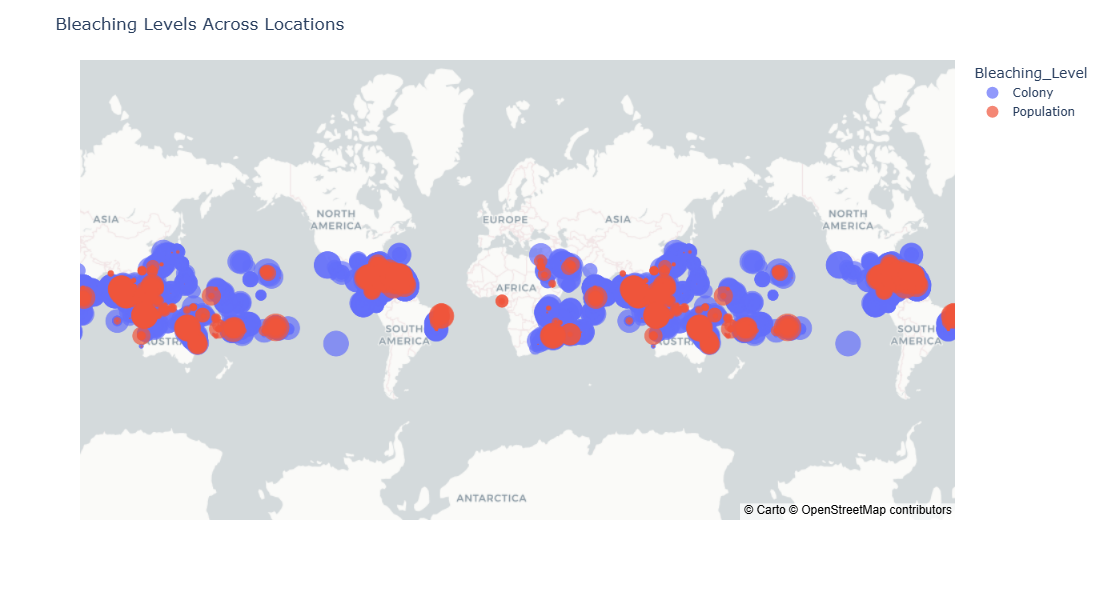

In [13]:
fig = px.scatter_mapbox(
    df,
    lat='Latitude_Degrees',
    lon='Longitude_Degrees',
    color='Bleaching_Level',
    size='Percent_Bleaching',
    mapbox_style="carto-positron",
    center={"lat": df['Latitude_Degrees'].mean(), "lon": df['Longitude_Degrees'].mean()},
    zoom=0
)

# Control the size of the graph
fig.update_layout(
    width=1000,  # Width of the graph in pixels
    height=600, # Height of the graph in pixels
    title="Bleaching Levels Across Locations"
)

fig.show()

## Distribution Analysis

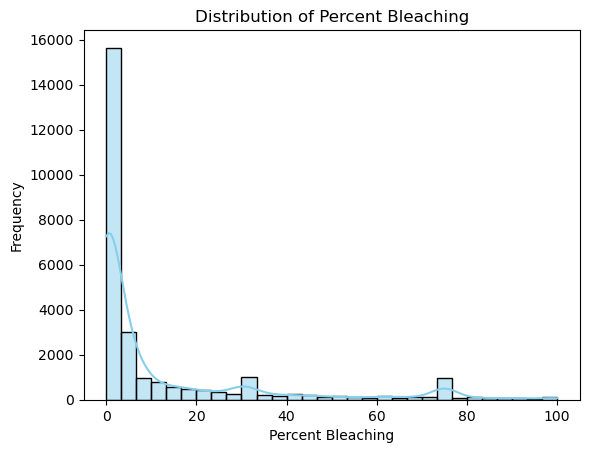

In [21]:
sns.histplot(df['Percent_Bleaching'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Percent Bleaching')
plt.xlabel('Percent Bleaching')
plt.ylabel('Frequency')
plt.show()

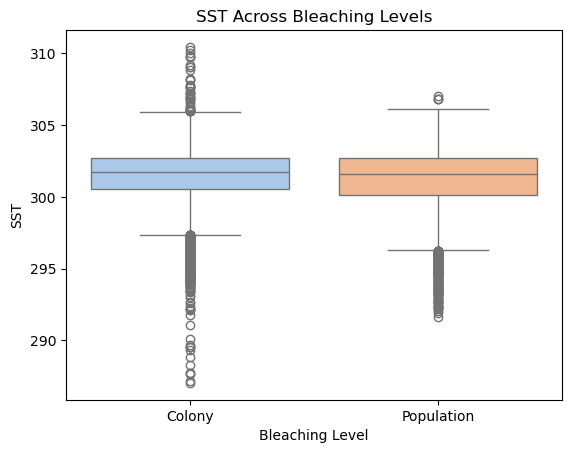

In [23]:
sns.boxplot(data=df, x='Bleaching_Level', y='SST', hue='Bleaching_Level', legend=False, palette='pastel')
plt.title('SST Across Bleaching Levels')
plt.xlabel('Bleaching Level')
plt.ylabel('SST')
plt.show()

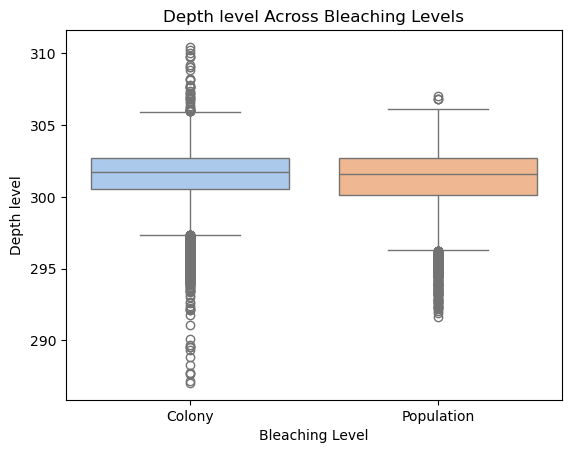

In [24]:
sns.boxplot(data=df, x='Bleaching_Level', y='SST', hue='Bleaching_Level', legend=False, palette='pastel')
plt.title('Depth level Across Bleaching Levels')
plt.xlabel('Bleaching Level')
plt.ylabel('Depth level')
plt.show()

## Temporal Trends

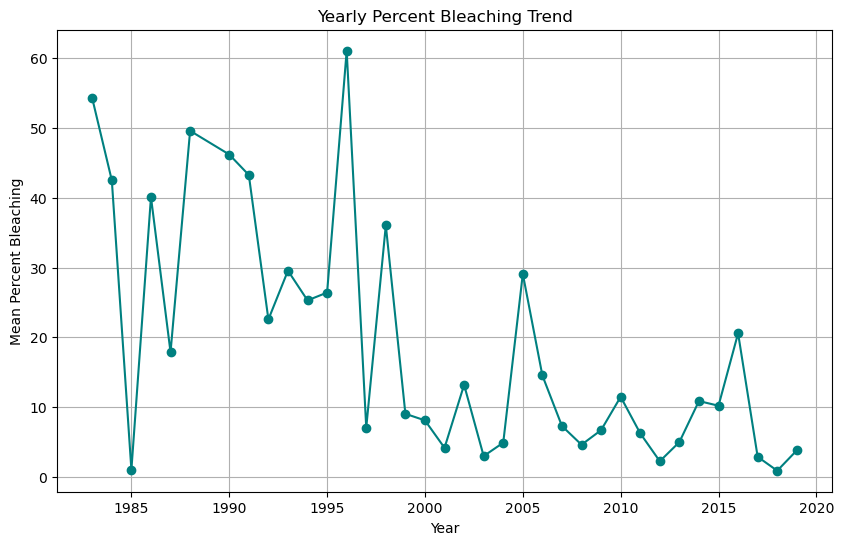

In [25]:
df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date column is datetime
temporal_df = df.groupby(df['Date'].dt.year)['Percent_Bleaching'].mean()

plt.figure(figsize=(10, 6))
plt.plot(temporal_df.index, temporal_df.values, marker='o', color='teal')
plt.title('Yearly Percent Bleaching Trend')
plt.xlabel('Year')
plt.ylabel('Mean Percent Bleaching')
plt.grid()
plt.show()

## Correlation Analysis

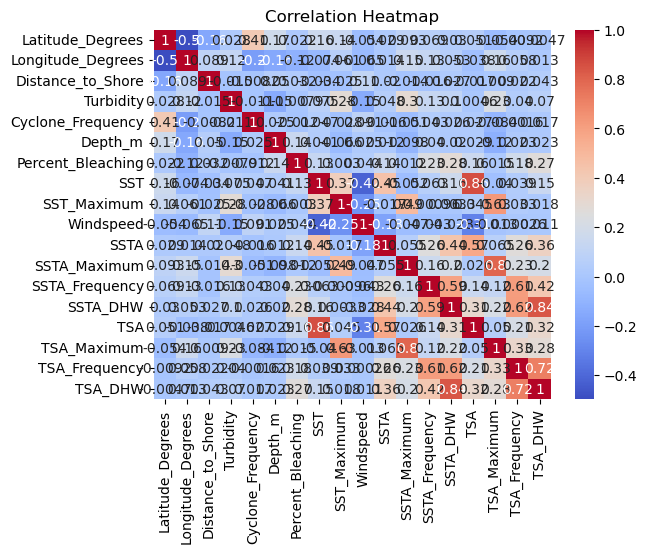

In [27]:
import numpy as np
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Multivariate Analysis

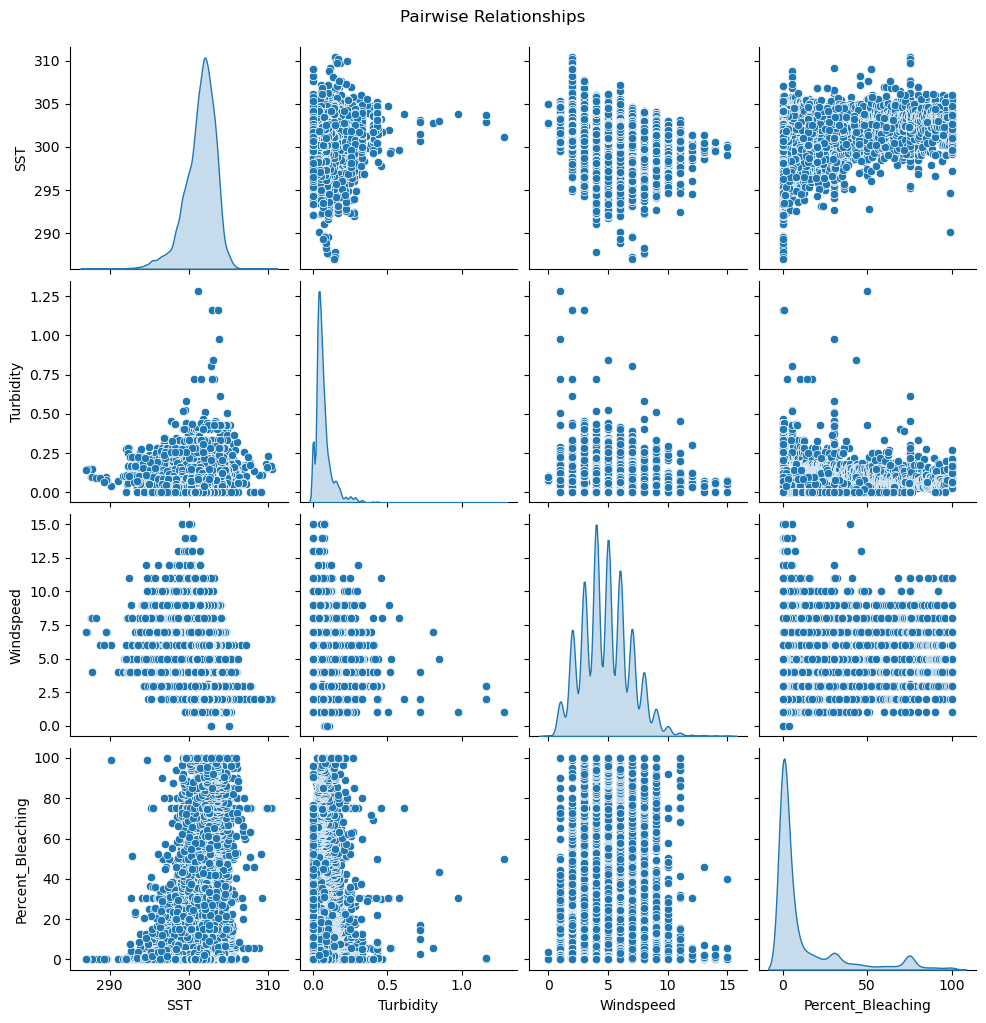

In [28]:
sns.pairplot(df[['SST', 'Turbidity', 'Windspeed', 'Percent_Bleaching']], diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


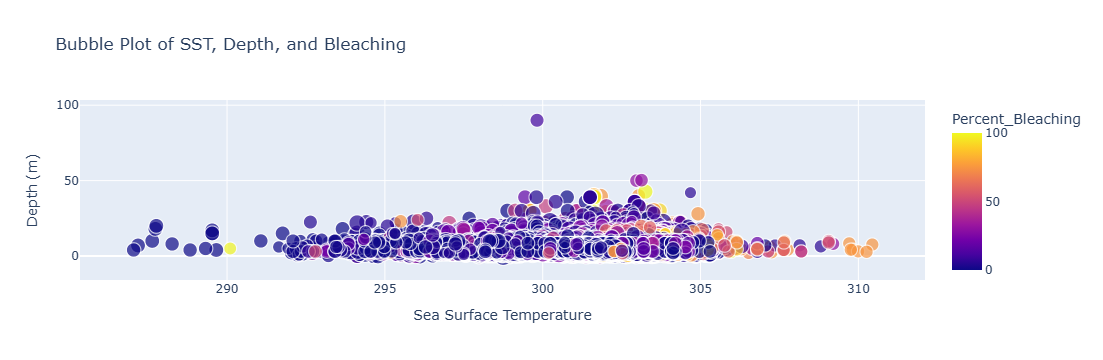

In [29]:
fig = px.scatter(
    df,
    x='SST',
    y='Depth_m',
    size='Cyclone_Frequency',
    color='Percent_Bleaching',
    title="Bubble Plot of SST, Depth, and Bleaching",
    labels={'SST': 'Sea Surface Temperature', 'Depth_m': 'Depth (m)'},
    hover_data=['Ocean_Name']
)
fig.show()
